# Project Title : Hotel Booking canceling prediction
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. arrival_date_month
2. deposit_type
3. customer_type
4. reservation_status
5. hotel
6. company
## DISCRETE: 
7. hotel
8. is_canceled
9. lead_time
10. arrival_date_year
11. arrival_date_week_number
12. arrival_date_day_of_month
13. stays_in_weekend_nights
14. stays_in_week_nights
15. adults
16. agent
17. days_in_waiting_list
18. required_car_parking_spaces
19. total_of_special_requests
## Continuous : 
20. adr

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
import xgboost as xg

In [10]:
from sklearn.ensemble import RandomForestClassifier


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [14]:
from sklearn.model_selection import KFold

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
df=pd.read_csv("hotel_bookings.csv")


In [18]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [19]:
df.isnull().sum() #finding total null values in all features 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Replacing NULL values with mode for country feature

In [22]:
mode_val=df['country'].mode()[0]


In [23]:
df['country']=df['country'].fillna(mode_val)


In [24]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [25]:
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='agent', ylabel='Density'>

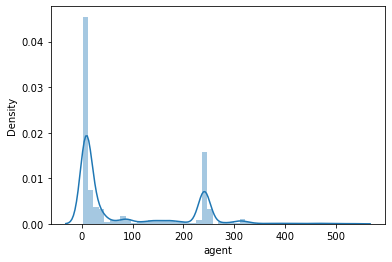

In [26]:
sns.distplot(df['agent'])

# Replacing NULL values with mode for agent feature

In [27]:
mode_val=df['agent'].mode()[0]

In [28]:
mode_val

9.0

In [29]:
df['agent']=df['agent'].fillna(mode_val)

In [30]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Most of the values are NULL in company feature so drop company feature

In [31]:
df.drop('company',axis=1,inplace=True)

In [32]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

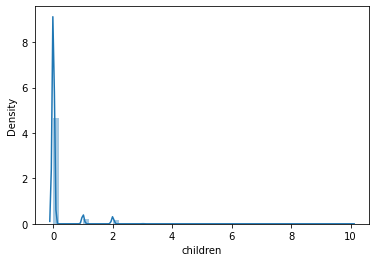

In [33]:
sns.distplot(df['children'])


# Applying log transformation on children feature 

In [34]:
df['children']=np.log(df['children'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
df['children']=df['children']>0

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

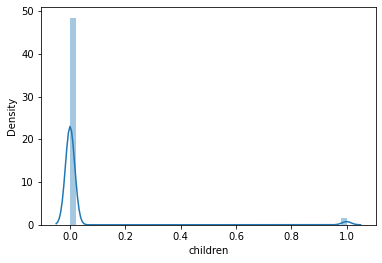

In [36]:
sns.distplot(df['children'])


In [37]:
df.shape

(119390, 31)

<AxesSubplot:xlabel='hotel', ylabel='count'>

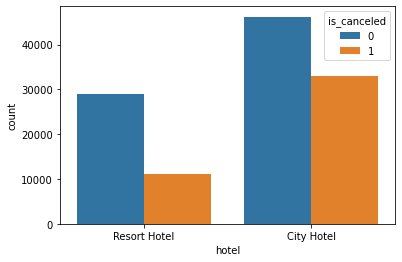

In [38]:
sns.countplot(x='hotel',hue='is_canceled',data=df)

In [39]:
df.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

In [40]:
val_df=df.groupby("hotel")['is_canceled'].value_counts().values


In [41]:
label_df=df.groupby("hotel")['is_canceled'].value_counts().index


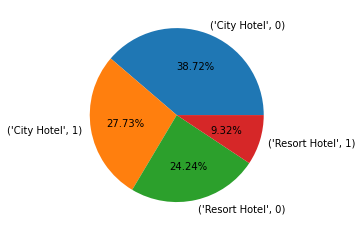

In [42]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meal', ylabel='count'>

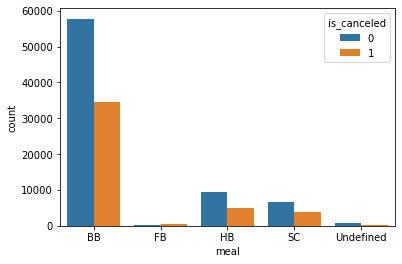

In [43]:
sns.countplot(df['meal'],hue=df['is_canceled'])

In [44]:
df.groupby('meal')['is_canceled'].value_counts()

meal       is_canceled
BB         0              57800
           1              34510
FB         1                478
           0                320
HB         0               9479
           1               4984
SC         0               6684
           1               3966
Undefined  0                883
           1                286
Name: is_canceled, dtype: int64

In [45]:
val_df=df.groupby("meal")['is_canceled'].value_counts().values


In [46]:
label_df=df.groupby("meal")['is_canceled'].value_counts().index


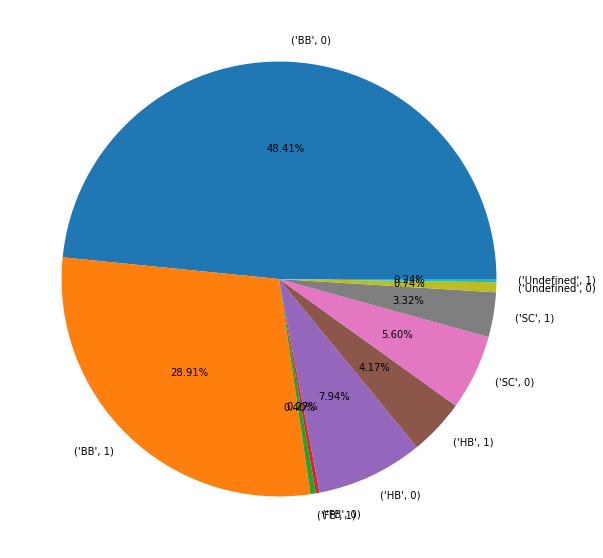

In [47]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='market_segment', ylabel='count'>

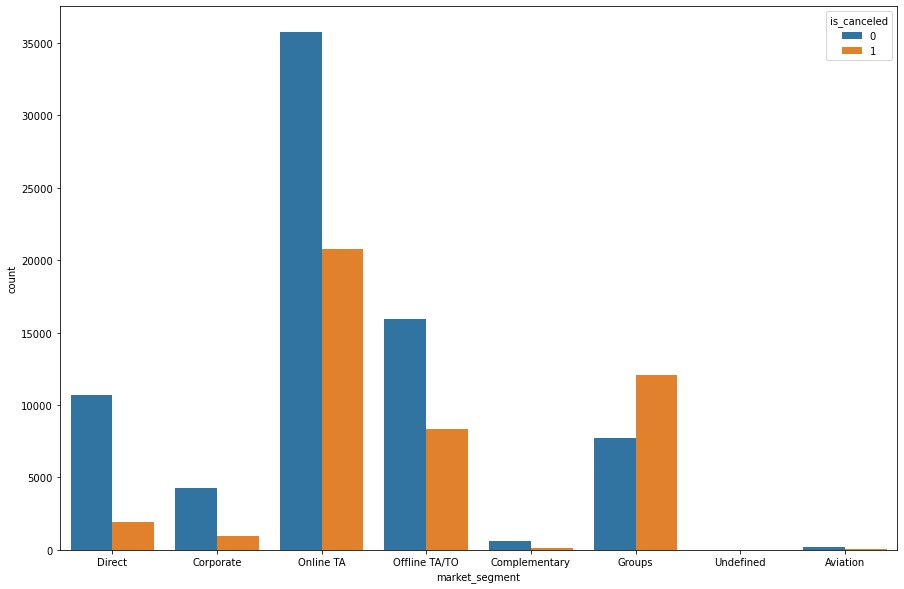

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(df['market_segment'],hue=df['is_canceled'])

In [49]:
df.groupby('market_segment')['is_canceled'].value_counts()

market_segment  is_canceled
Aviation        0                185
                1                 52
Complementary   0                646
                1                 97
Corporate       0               4303
                1                992
Direct          0              10672
                1               1934
Groups          1              12097
                0               7714
Offline TA/TO   0              15908
                1               8311
Online TA       0              35738
                1              20739
Undefined       1                  2
Name: is_canceled, dtype: int64

In [50]:
val_df=df.groupby("market_segment")['is_canceled'].value_counts().values


In [51]:
label_df=df.groupby("market_segment")['is_canceled'].value_counts().index


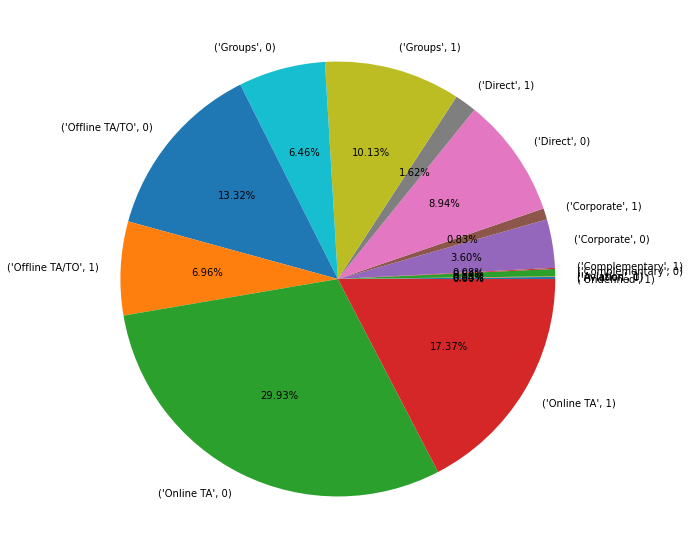

In [52]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

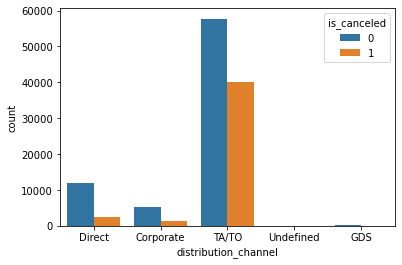

In [53]:
sns.countplot(df['distribution_channel'],hue=df['is_canceled'])

In [54]:
df.groupby('distribution_channel')['is_canceled'].value_counts()

distribution_channel  is_canceled
Corporate             0               5203
                      1               1474
Direct                0              12088
                      1               2557
GDS                   0                156
                      1                 37
TA/TO                 0              57718
                      1              40152
Undefined             1                  4
                      0                  1
Name: is_canceled, dtype: int64

In [55]:
val_df=df.groupby("distribution_channel")['is_canceled'].value_counts().values


In [56]:
label_df=df.groupby("distribution_channel")['is_canceled'].value_counts().index


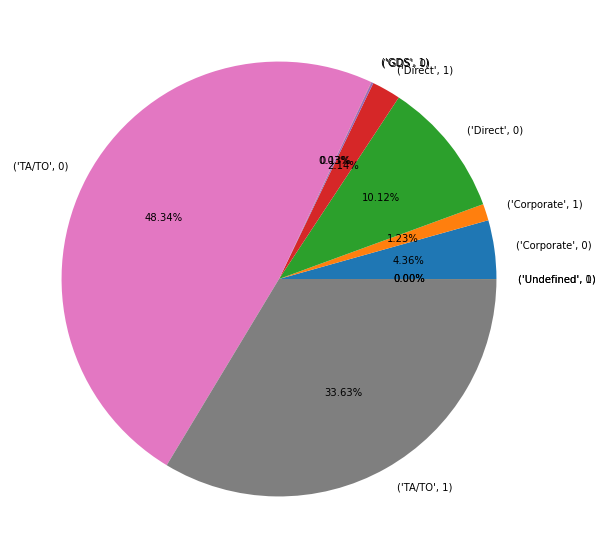

In [57]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

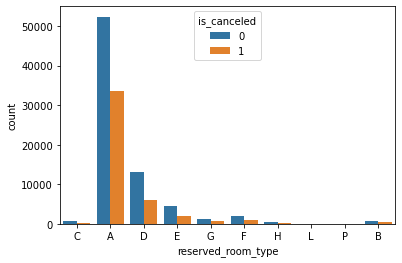

In [58]:
sns.countplot(df['reserved_room_type'],hue=df['is_canceled'])

In [59]:
df.groupby('reserved_room_type')['is_canceled'].value_counts()

reserved_room_type  is_canceled
A                   0              52364
                    1              33630
B                   0                750
                    1                368
C                   0                624
                    1                308
D                   0              13099
                    1               6102
E                   0               4621
                    1               1914
F                   0               2017
                    1                880
G                   0               1331
                    1                763
H                   0                356
                    1                245
L                   0                  4
                    1                  2
P                   1                 12
Name: is_canceled, dtype: int64

In [60]:
val_df=df.groupby("reserved_room_type")['is_canceled'].value_counts().values


In [61]:
label_df=df.groupby("reserved_room_type")['is_canceled'].value_counts().index


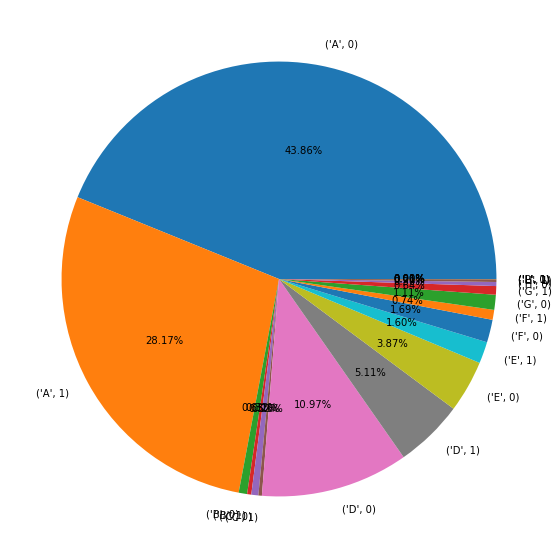

In [62]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

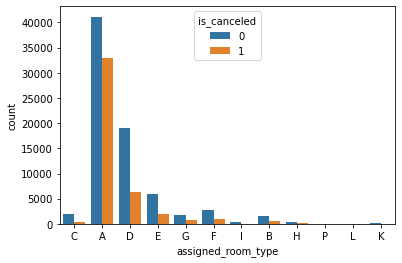

In [63]:
sns.countplot(df['assigned_room_type'],hue=df['is_canceled'])

In [64]:
df.groupby('assigned_room_type')['is_canceled'].value_counts()

assigned_room_type  is_canceled
A                   0              41105
                    1              32948
B                   0               1651
                    1                512
C                   0               1929
                    1                446
D                   0              18960
                    1               6362
E                   0               5838
                    1               1968
F                   0               2824
                    1                927
G                   0               1773
                    1                780
H                   0                461
                    1                251
I                   0                358
                    1                  5
K                   0                267
                    1                 12
L                   1                  1
P                   1                 12
Name: is_canceled, dtype: int64

In [65]:
val_df=df.groupby("assigned_room_type")['is_canceled'].value_counts().values


In [66]:
label_df=df.groupby("assigned_room_type")['is_canceled'].value_counts().index


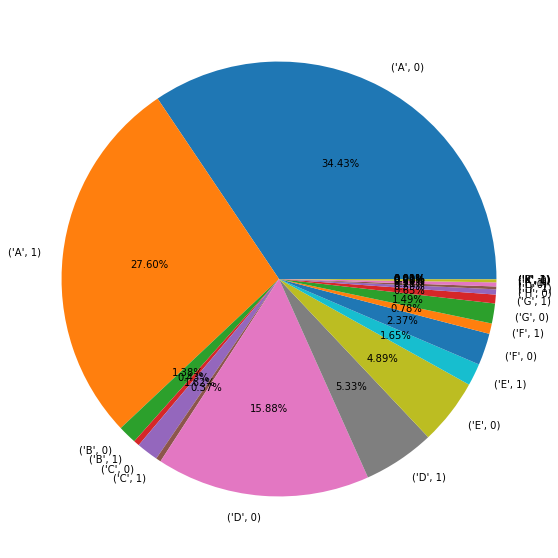

In [67]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit_type', ylabel='count'>

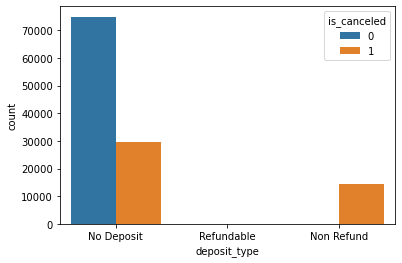

In [68]:
sns.countplot(df['deposit_type'],hue=df['is_canceled'])

In [69]:
pd.crosstab(index=df['deposit_type'],columns=df['is_canceled'])

is_canceled,0,1
deposit_type,,
No Deposit,74947,29694
Non Refund,93,14494
Refundable,126,36


In [70]:
df.groupby('deposit_type')['is_canceled'].value_counts()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    1              14494
              0                 93
Refundable    0                126
              1                 36
Name: is_canceled, dtype: int64

In [71]:
val_df=df.groupby("deposit_type")['is_canceled'].value_counts().values


In [72]:
label_df=df.groupby("deposit_type")['is_canceled'].value_counts().index


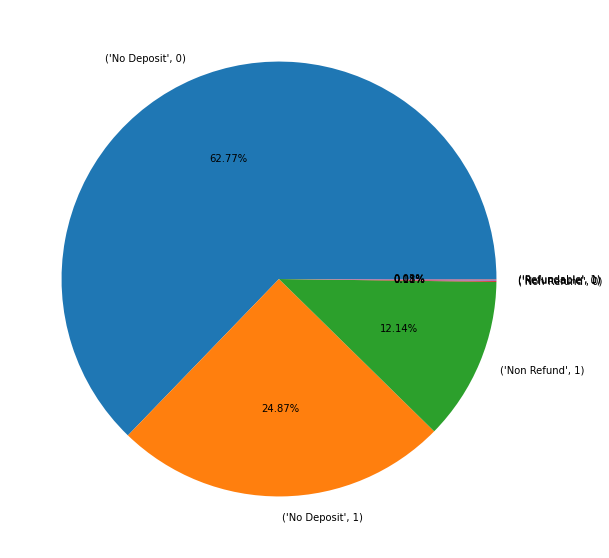

In [73]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_type', ylabel='count'>

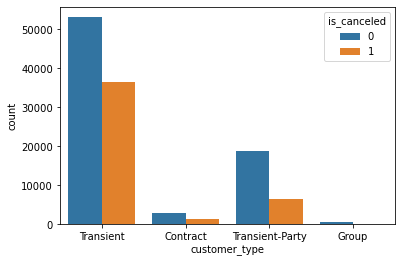

In [74]:
sns.countplot(df['customer_type'],hue=df['is_canceled'])

In [75]:
pd.crosstab(index=df['customer_type'],columns=df['is_canceled'])

is_canceled,0,1
customer_type,,
Contract,2814,1262
Group,518,59
Transient,53099,36514
Transient-Party,18735,6389


In [76]:
df.groupby('customer_type')['is_canceled'].value_counts()

customer_type    is_canceled
Contract         0               2814
                 1               1262
Group            0                518
                 1                 59
Transient        0              53099
                 1              36514
Transient-Party  0              18735
                 1               6389
Name: is_canceled, dtype: int64

In [77]:
val_df=df.groupby("customer_type")['is_canceled'].value_counts().values


In [78]:
label_df=df.groupby("customer_type")['is_canceled'].value_counts().index


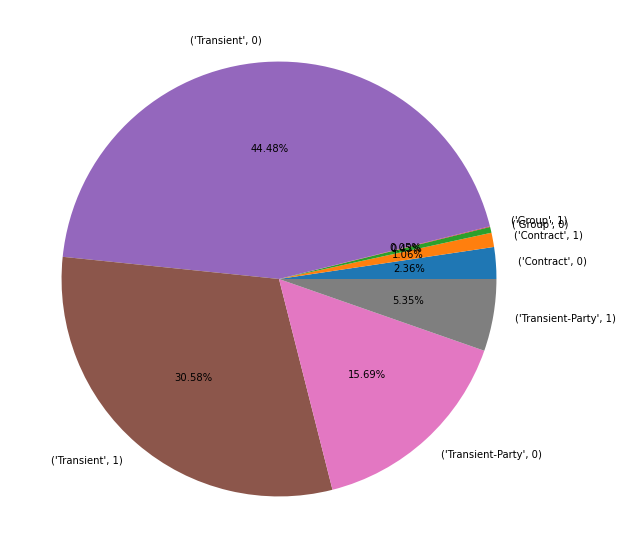

In [79]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reservation_status', ylabel='count'>

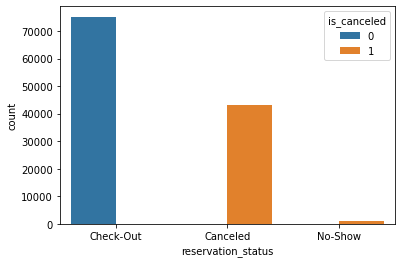

In [80]:
sns.countplot(df['reservation_status'],hue=df['is_canceled'])

In [81]:
pd.crosstab(index=df['reservation_status'],columns=df['is_canceled'])

is_canceled,0,1
reservation_status,,
Canceled,0,43017
Check-Out,75166,0
No-Show,0,1207


In [82]:
df.groupby('reservation_status')['is_canceled'].value_counts()

reservation_status  is_canceled
Canceled            1              43017
Check-Out           0              75166
No-Show             1               1207
Name: is_canceled, dtype: int64

In [83]:
val_df=df.groupby("reservation_status")['is_canceled'].value_counts().values


In [84]:
label_df=df.groupby("reservation_status")['is_canceled'].value_counts().index


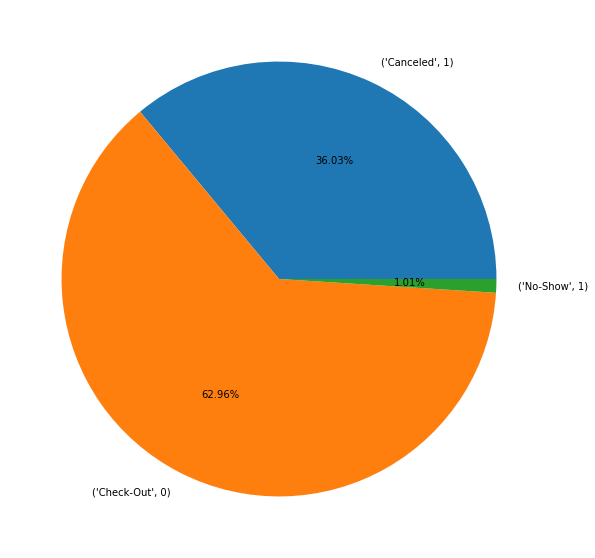

In [85]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

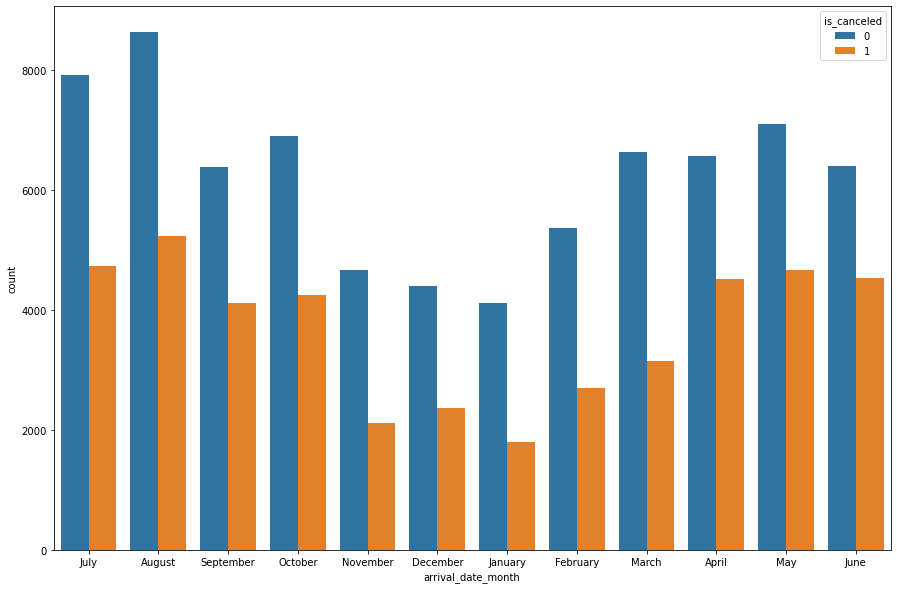

In [86]:
plt.figure(figsize=(15,10))
sns.countplot(df['arrival_date_month'],hue=df['is_canceled'])

In [87]:
df.groupby('arrival_date_month')['is_canceled'].value_counts()

arrival_date_month  is_canceled
April               0              6565
                    1              4524
August              0              8638
                    1              5239
December            0              4409
                    1              2371
February            0              5372
                    1              2696
January             0              4122
                    1              1807
July                0              7919
                    1              4742
June                0              6404
                    1              4535
March               0              6645
                    1              3149
May                 0              7114
                    1              4677
November            0              4672
                    1              2122
October             0              6914
                    1              4246
September           0              6392
                    1              4116
Name: is

In [88]:
pd.crosstab(index=df['arrival_date_month'],columns=df['is_canceled'])

is_canceled,0,1
arrival_date_month,,
April,6565,4524
August,8638,5239
December,4409,2371
February,5372,2696
January,4122,1807
July,7919,4742
June,6404,4535
March,6645,3149
May,7114,4677


In [89]:
val_df=df.groupby("arrival_date_month")['is_canceled'].value_counts().values


In [90]:
label_df=df.groupby("arrival_date_month")['is_canceled'].value_counts().index


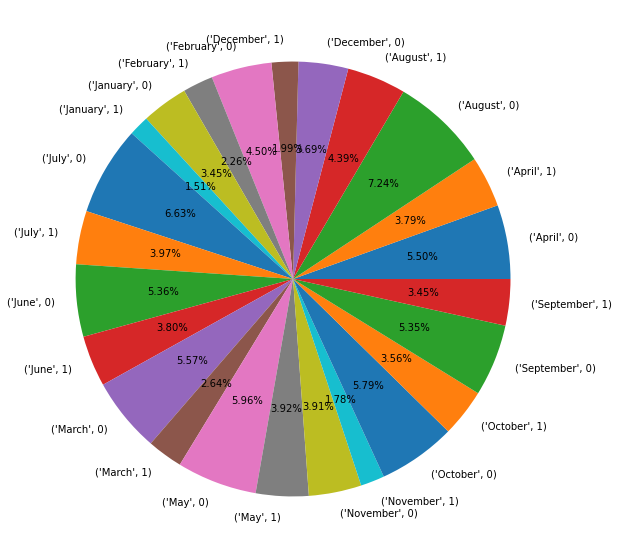

In [91]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [92]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

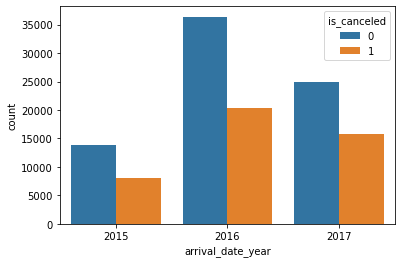

In [93]:
sns.countplot(df['arrival_date_year'],hue=df['is_canceled'])

In [94]:
df.groupby('arrival_date_month')['is_canceled'].value_counts()

arrival_date_month  is_canceled
April               0              6565
                    1              4524
August              0              8638
                    1              5239
December            0              4409
                    1              2371
February            0              5372
                    1              2696
January             0              4122
                    1              1807
July                0              7919
                    1              4742
June                0              6404
                    1              4535
March               0              6645
                    1              3149
May                 0              7114
                    1              4677
November            0              4672
                    1              2122
October             0              6914
                    1              4246
September           0              6392
                    1              4116
Name: is

In [95]:
pd.crosstab(index=df['arrival_date_year'],columns=df['is_canceled'])

is_canceled,0,1
arrival_date_year,,
2015,13854,8142
2016,36370,20337
2017,24942,15745


In [96]:
val_df=df.groupby("arrival_date_year")['is_canceled'].value_counts().values


In [97]:
label_df=df.groupby("arrival_date_year")['is_canceled'].value_counts().index


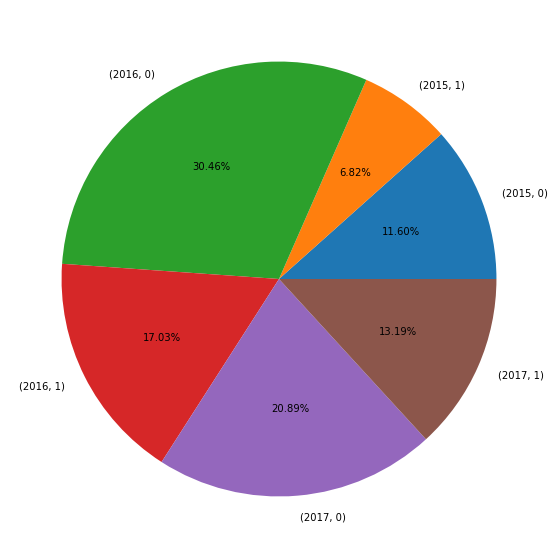

In [98]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='count'>

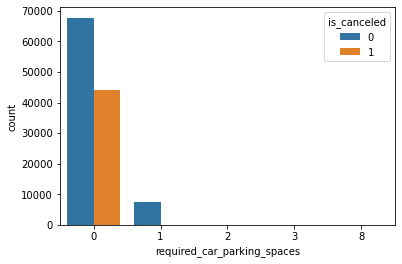

In [99]:
sns.countplot(df['required_car_parking_spaces'],hue=df['is_canceled'])

In [100]:
df.groupby('required_car_parking_spaces')['is_canceled'].value_counts()

required_car_parking_spaces  is_canceled
0                            0              67750
                             1              44224
1                            0               7383
2                            0                 28
3                            0                  3
8                            0                  2
Name: is_canceled, dtype: int64

In [101]:
pd.crosstab(index=df['required_car_parking_spaces'],columns=df['is_canceled'])

is_canceled,0,1
required_car_parking_spaces,,
0,67750,44224
1,7383,0
2,28,0
3,3,0
8,2,0


In [102]:
val_df=df.groupby("required_car_parking_spaces")['is_canceled'].value_counts().values


In [103]:
label_df=df.groupby("required_car_parking_spaces")['is_canceled'].value_counts().index


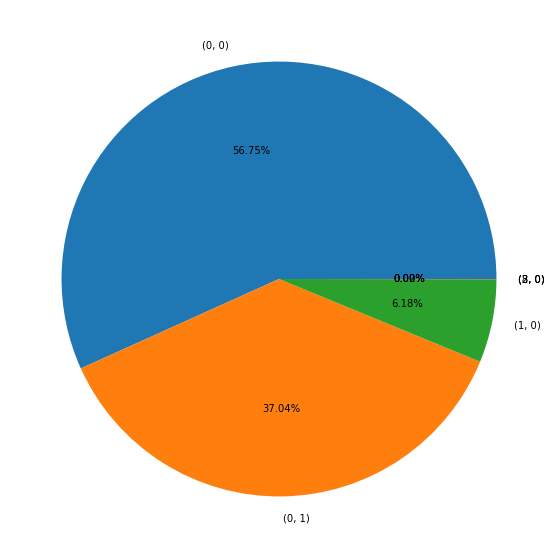

In [104]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:>

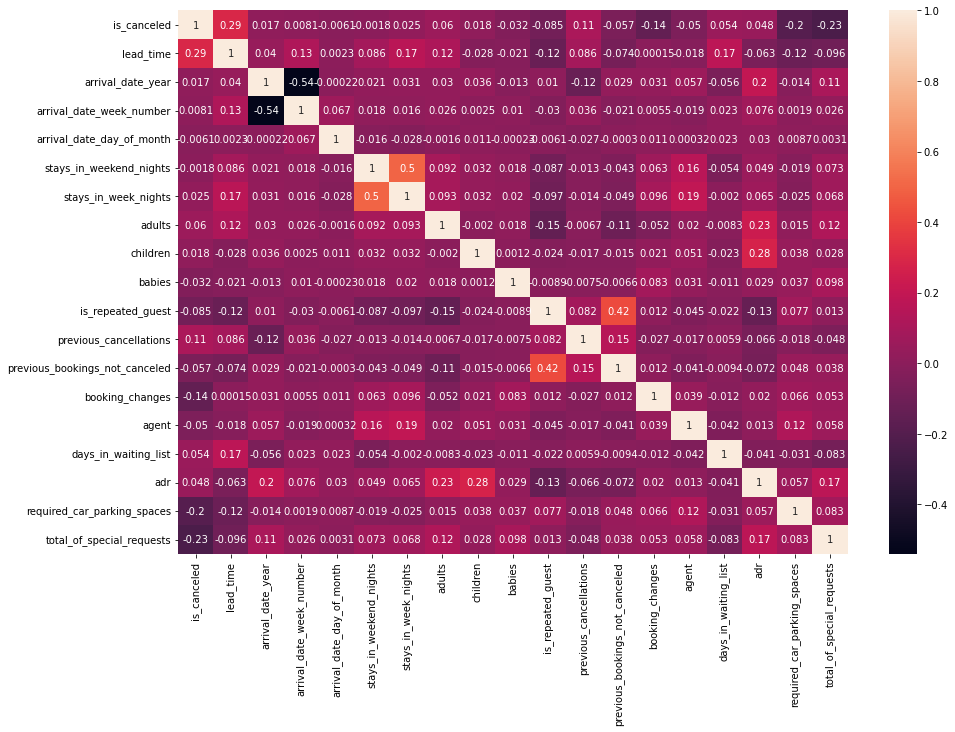

In [105]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


In [106]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,76.060080,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,106.323205,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lead_time'>

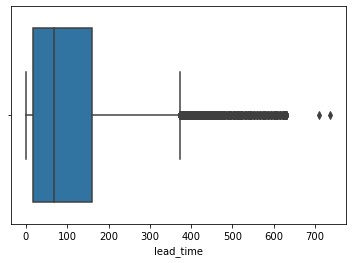

In [107]:
sns.boxplot(df['lead_time'])

In [108]:
q1=df['lead_time'].quantile(0.25)

In [109]:
q3=df['lead_time'].quantile(0.75)

In [110]:
IQR=q3-q1

In [111]:
lower=q1-1.5*IQR

In [112]:
higher=q3+1.5*IQR

In [113]:
df=df[(df['lead_time']>lower) & (df['lead_time']<higher)]

In [114]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lead_time'>

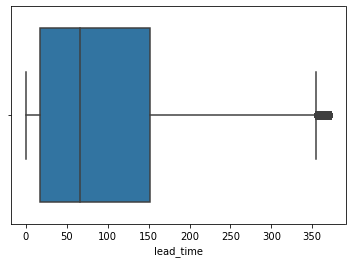

In [115]:
sns.boxplot(df['lead_time'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stays_in_weekend_nights'>

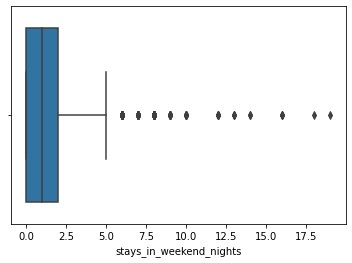

In [116]:
sns.boxplot(df['stays_in_weekend_nights'])


In [117]:
q1=df['stays_in_weekend_nights'].quantile(0.25)

In [118]:
q3=df['stays_in_weekend_nights'].quantile(0.75)

In [119]:
IQR=q3-q1

In [120]:
lower=q1-1.5*IQR

In [121]:
higher=q3+1.5*IQR

In [122]:
df=df[(df['stays_in_weekend_nights']>lower) & (df['stays_in_weekend_nights']<higher)]

In [123]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stays_in_weekend_nights'>

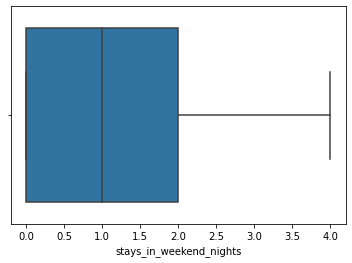

In [124]:
sns.boxplot(df['stays_in_weekend_nights'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stays_in_week_nights'>

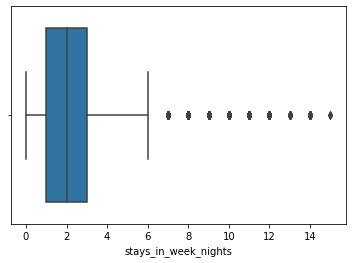

In [125]:
sns.boxplot(df['stays_in_week_nights'])

In [126]:
q1=df['stays_in_week_nights'].quantile(0.25)

In [127]:
q3=df['stays_in_week_nights'].quantile(0.75)

In [128]:
IQR=q3-q1

In [129]:
lower=q1-1.5*IQR

In [130]:
higher=q3+1.5*IQR

In [131]:
df=df[(df['stays_in_week_nights']>lower) & (df['stays_in_week_nights']<higher)]

In [132]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stays_in_week_nights'>

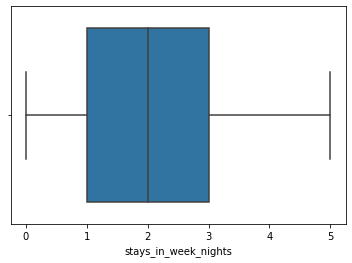

In [133]:
sns.boxplot(df['stays_in_week_nights'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adr'>

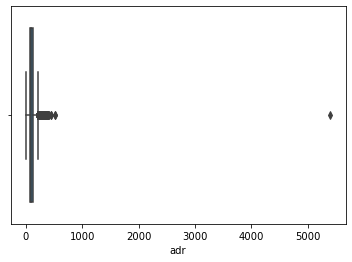

In [134]:
sns.boxplot(df['adr'])

In [135]:
q1=df['adr'].quantile(0.25)

In [136]:
q3=df['adr'].quantile(0.75)

In [137]:
IQR=q3-q1

In [138]:
lower=q1-1.5*IQR

In [139]:
higher=q3+1.5*IQR

In [140]:
df=df[(df['adr']>lower) & (df['adr']<higher)]

In [141]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,0,No Deposit,42.0,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adr'>

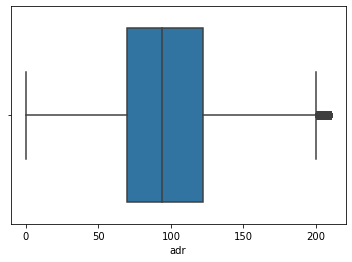

In [142]:
sns.boxplot(df['adr'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arrival_date_week_number'>

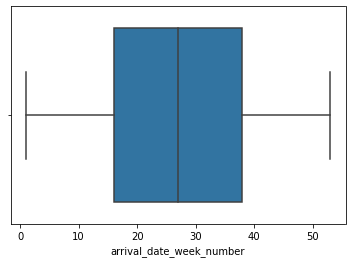

In [143]:
sns.boxplot(df['arrival_date_week_number'])

In [144]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,0,No Deposit,42.0,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07


In [145]:
le=LabelEncoder()


In [146]:
df['hotel']=le.fit_transform(df['hotel'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\2555674147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel']=le.fit_transform(df['hotel'])


In [147]:
df['arrival_date_month']=le.fit_transform(df['arrival_date_month'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\167332061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date_month']=le.fit_transform(df['arrival_date_month'])


In [148]:
df['deposit_type']=le.fit_transform(df['deposit_type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\1551579116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deposit_type']=le.fit_transform(df['deposit_type'])


In [149]:
df['customer_type']=le.fit_transform(df['customer_type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\3710418452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_type']=le.fit_transform(df['customer_type'])


In [150]:
df['reservation_status']=le.fit_transform(df['reservation_status'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\1630656514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status']=le.fit_transform(df['reservation_status'])


In [151]:

df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,9.0,0,2,0.00,0,0,1,2015-07-01
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,9.0,0,2,75.00,0,0,1,2015-07-02
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.00,0,0,1,2015-07-02
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.00,0,1,1,2015-07-03
5,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.00,0,1,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,0,164,2017,1,35,31,2,4,2,...,0,0,42.0,0,2,87.60,0,0,1,2017-09-06
119384,0,0,21,2017,1,35,30,2,5,2,...,0,0,394.0,0,2,96.14,0,2,1,2017-09-06
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,394.0,0,2,96.14,0,0,1,2017-09-06
119387,0,0,34,2017,1,35,31,2,5,2,...,0,0,9.0,0,2,157.71,0,4,1,2017-09-07


In [152]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\185443808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])


In [153]:
df['reservation_status_month']=df['reservation_status_date'].dt.month

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\1472176032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_month']=df['reservation_status_date'].dt.month


In [154]:
df['reservation_status_year']=df['reservation_status_date'].dt.year

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\434961534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_year']=df['reservation_status_date'].dt.year


In [155]:
df['reservation_status_day']=df['reservation_status_date'].dt.day

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\1228652186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_day']=df['reservation_status_date'].dt.day


In [156]:
df['meal']=le.fit_transform(df['meal'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\661616107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meal']=le.fit_transform(df['meal'])


In [157]:
df['country']=le.fit_transform(df['country'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\3078563146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country']=le.fit_transform(df['country'])


In [158]:
df['market_segment']=le.fit_transform(df['market_segment'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\2986281334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_segment']=le.fit_transform(df['market_segment'])


In [159]:
df['distribution_channel']=le.fit_transform(df['distribution_channel'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\3661906124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distribution_channel']=le.fit_transform(df['distribution_channel'])


In [160]:
df['reserved_room_type']=le.fit_transform(df['reserved_room_type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\1653862756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reserved_room_type']=le.fit_transform(df['reserved_room_type'])


In [161]:
df['assigned_room_type']=le.fit_transform(df['assigned_room_type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\136948882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['assigned_room_type']=le.fit_transform(df['assigned_room_type'])


In [162]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_month,reservation_status_year,reservation_status_day
0,1,0,342,2015,5,27,1,0,0,2,...,0,2,0.00,0,0,1,2015-07-01,7,2015,1
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,75.00,0,0,1,2015-07-02,7,2015,2
3,1,0,13,2015,5,27,1,0,1,1,...,0,2,75.00,0,0,1,2015-07-02,7,2015,2
4,1,0,14,2015,5,27,1,0,2,2,...,0,2,98.00,0,1,1,2015-07-03,7,2015,3
5,1,0,14,2015,5,27,1,0,2,2,...,0,2,98.00,0,1,1,2015-07-03,7,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,0,164,2017,1,35,31,2,4,2,...,0,2,87.60,0,0,1,2017-09-06,9,2017,6
119384,0,0,21,2017,1,35,30,2,5,2,...,0,2,96.14,0,2,1,2017-09-06,9,2017,6
119385,0,0,23,2017,1,35,30,2,5,2,...,0,2,96.14,0,0,1,2017-09-06,9,2017,6
119387,0,0,34,2017,1,35,31,2,5,2,...,0,2,157.71,0,4,1,2017-09-07,9,2017,7


In [163]:
df.drop('reservation_status_date',axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32180\4241393354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('reservation_status_date',axis=1,inplace=True)


In [164]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_month,reservation_status_year,reservation_status_day
0,1,0,342,2015,5,27,1,0,0,2,...,9.0,0,2,0.00,0,0,1,7,2015,1
2,1,0,7,2015,5,27,1,0,1,1,...,9.0,0,2,75.00,0,0,1,7,2015,2
3,1,0,13,2015,5,27,1,0,1,1,...,304.0,0,2,75.00,0,0,1,7,2015,2
4,1,0,14,2015,5,27,1,0,2,2,...,240.0,0,2,98.00,0,1,1,7,2015,3
5,1,0,14,2015,5,27,1,0,2,2,...,240.0,0,2,98.00,0,1,1,7,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,0,164,2017,1,35,31,2,4,2,...,42.0,0,2,87.60,0,0,1,9,2017,6
119384,0,0,21,2017,1,35,30,2,5,2,...,394.0,0,2,96.14,0,2,1,9,2017,6
119385,0,0,23,2017,1,35,30,2,5,2,...,394.0,0,2,96.14,0,0,1,9,2017,6
119387,0,0,34,2017,1,35,31,2,5,2,...,9.0,0,2,157.71,0,4,1,9,2017,7


In [165]:
df['is_canceled'].value_counts()

0    68751
1    39039
Name: is_canceled, dtype: int64

In [166]:
y=df['is_canceled']

In [167]:
X=df.drop('is_canceled',axis=1)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [169]:
X_train.shape

(72219, 32)

In [170]:
my_model = xg.XGBClassifier()

In [171]:
my_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [172]:
y_pred=my_model.predict(X_test)

In [173]:
accuracy_score(y_test,y_pred)

1.0

In [174]:
confusion_matrix(y_test,y_pred)

array([[22581,     0],
       [    0, 12990]], dtype=int64)

In [175]:
mean_squared_error(y_test,y_pred)

0.0

In [176]:
rfc=RandomForestClassifier()


In [177]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [178]:
y_pred=rfc.predict(X_test)


In [179]:
accuracy_score(y_test,y_pred)

0.9999718872114925

In [180]:
confusion_matrix(y_test,y_pred)

array([[22581,     0],
       [    1, 12989]], dtype=int64)

In [181]:
mean_squared_error(y_test,y_pred)

2.811278850749206e-05

In [182]:
dtc=DecisionTreeClassifier()

In [183]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [184]:
y_pred=dtc.predict(X_test)


In [185]:
accuracy_score(y_test,y_pred)

1.0

In [186]:
confusion_matrix(y_test,y_pred)

array([[22581,     0],
       [    0, 12990]], dtype=int64)

In [187]:
mean_squared_error(y_test,y_pred)

0.0

In [188]:
lr=LogisticRegression()


In [189]:
lr.fit(X_train,y_train)

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [190]:
y_pred=lr.predict(X_test)


In [191]:
accuracy_score(y_test,y_pred)

0.7916561243709763

In [192]:
confusion_matrix(y_test,y_pred)

array([[19999,  2582],
       [ 4829,  8161]], dtype=int64)

In [193]:
mean_squared_error(y_test,y_pred)

0.20834387562902365

In [194]:
knc=KNeighborsClassifier()


In [195]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [196]:
y_pred=knc.predict(X_test)


In [197]:
accuracy_score(y_test,y_pred)

0.844086474937449

In [198]:
confusion_matrix(y_test,y_pred)

array([[20774,  1807],
       [ 3739,  9251]], dtype=int64)

In [199]:
mean_squared_error(y_test,y_pred)

0.15591352506255096

In [200]:
gbc=GradientBoostingClassifier()


In [201]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [202]:
y_pred=gbc.predict(X_test)


In [203]:
accuracy_score(y_test,y_pred)

1.0

In [204]:
confusion_matrix(y_test,y_pred)

array([[22581,     0],
       [    0, 12990]], dtype=int64)

In [205]:
gbc.predict_proba(X_test)

array([[2.75187055e-05, 9.99972481e-01],
       [2.75187055e-05, 9.99972481e-01],
       [2.75187055e-05, 9.99972481e-01],
       ...,
       [9.99983996e-01, 1.60039574e-05],
       [9.99983996e-01, 1.60039574e-05],
       [9.99983996e-01, 1.60039574e-05]])

In [206]:
mean_squared_error(y_test,y_pred)

0.0